In [102]:
pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [103]:
pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [105]:
df = pd.read_csv("newtrain.csv", index_col=0) # I have taken newtrain dataset from previous assignment where i have done columns transformations
df.reset_index(drop=True, inplace=True) 

In [106]:
df

,year,month,day_of_week,hour_of_day,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day_period
0,2011,1,5,0,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,night
1,2011,1,5,1,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,night
2,2011,1,5,2,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,night
3,2011,1,5,3,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,night
4,2011,1,5,4,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012,12,2,19,winter,0,1,1,15.58,19.695,50,26.0027,7,329,336,evening
10882,2012,12,2,20,winter,0,1,1,14.76,17.425,57,15.0013,10,231,241,evening
10883,2012,12,2,21,winter,0,1,1,13.94,15.910,61,15.0013,4,164,168,evening
10884,2012,12,2,22,winter,0,1,1,13.94,17.425,61,6.0032,12,117,129,evening


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         10886 non-null  int64  
 1   month        10886 non-null  int64  
 2   day_of_week  10886 non-null  int64  
 3   hour_of_day  10886 non-null  int64  
 4   season       10886 non-null  object 
 5   holiday      10886 non-null  int64  
 6   workingday   10886 non-null  int64  
 7   weather      10886 non-null  int64  
 8   temp         10886 non-null  float64
 9   atemp        10886 non-null  float64
 10  humidity     10886 non-null  int64  
 11  windspeed    10886 non-null  float64
 12  casual       10886 non-null  int64  
 13  registered   10886 non-null  int64  
 14  count        10886 non-null  int64  
 15  day_period   10886 non-null  object 
dtypes: float64(3), int64(11), object(2)
memory usage: 1.3+ MB


# Data Visualization

## 1. Plot the distributions of all the numerical columns in the dataset using histograms.

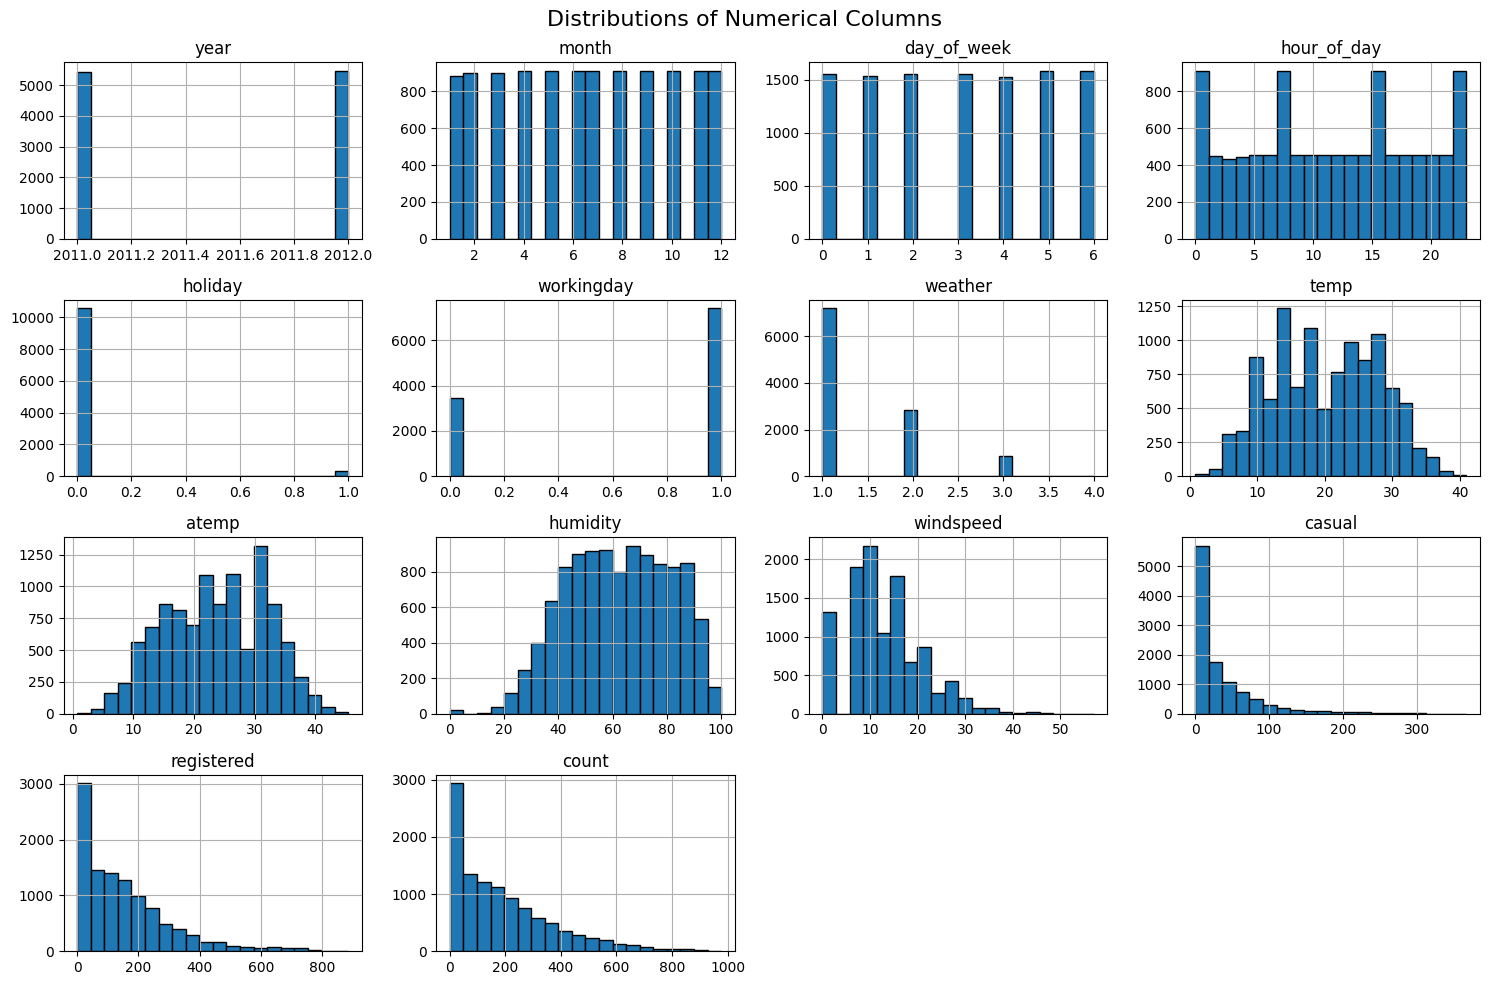

In [108]:
numerical_col = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_col].hist( bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Distributions of Numerical Columns", fontsize=16)

plt.tight_layout()
plt.show()

## 2. Plot the distributions of all the numerical columns in the dataset using box plots.

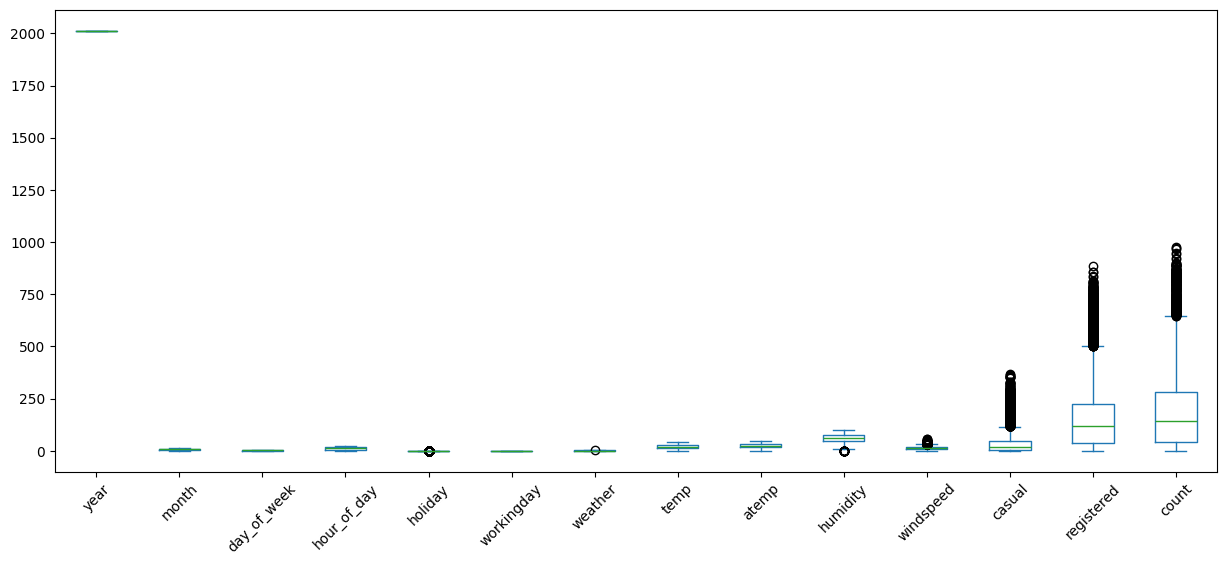

In [109]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_cols].plot(kind='box', figsize=(15, 6))
plt.xticks(rotation=45)
plt.show()

## 3. Plot the the mean of the hourly total rentals count for working and non-working days.

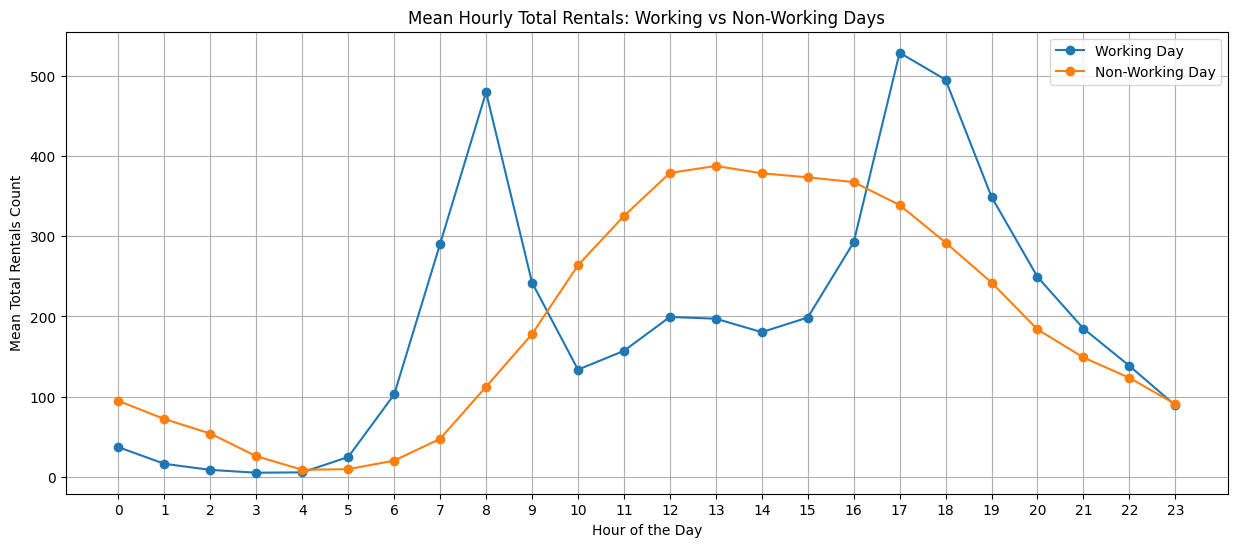

In [110]:
mean_hourly = df.groupby(['hour_of_day', 'workingday'])['count'].mean().reset_index()

working = mean_hourly[mean_hourly['workingday'] == 1]
non_working = mean_hourly[mean_hourly['workingday'] == 0]

plt.figure(figsize=(15, 6))
plt.plot(working['hour_of_day'], working['count'], label='Working Day', marker='o')
plt.plot(non_working['hour_of_day'], non_working['count'], label='Non-Working Day', marker='o')

plt.xlabel("Hour of the Day")
plt.ylabel("Mean Total Rentals Count")
plt.xticks(range(0, 24))
plt.title("Mean Hourly Total Rentals: Working vs Non-Working Days")
plt.legend()
plt.grid(True)
plt.show()

## 4. Plot the the mean of the hourly total rentals count for the different months for both years combined.

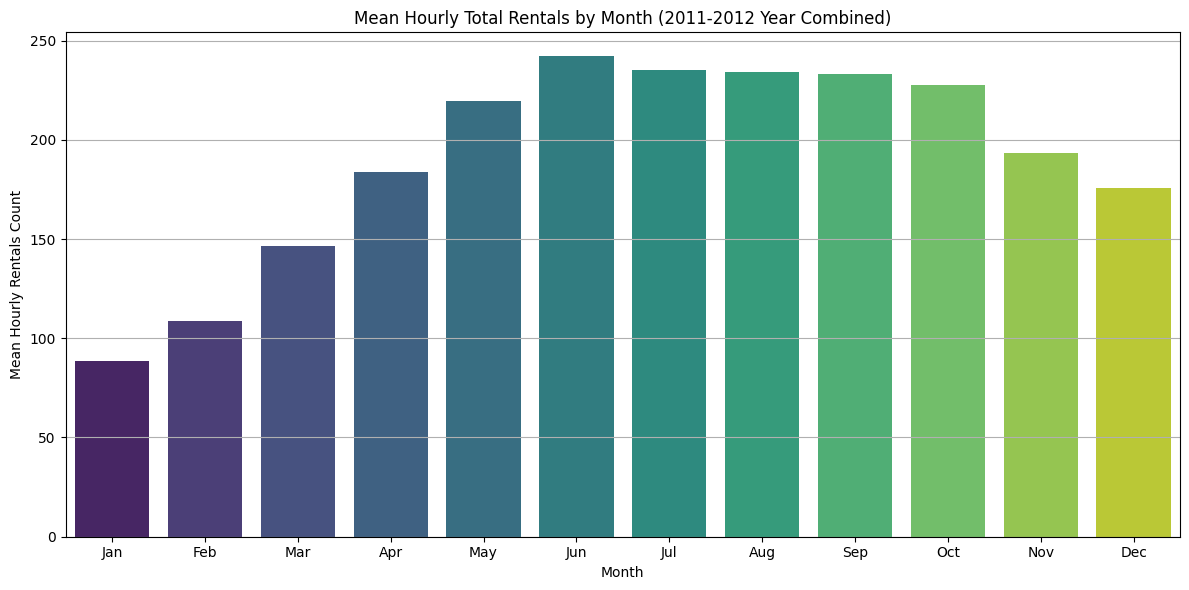

In [111]:
hourly_mean =  df.groupby(['month', 'hour_of_day'])['count'].mean().reset_index()

mean_rentals_by_month = hourly_mean.groupby('month')['count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot( data=mean_rentals_by_month, x='month', y='count', palette='viridis')

plt.title('Mean Hourly Total Rentals by Month (2011-2012 Year Combined)')
plt.xlabel('Month')
plt.ylabel('Mean Hourly Rentals Count')

plt.xticks( ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 5. Plot the the mean of the hourly total rentals count for the different months for both years separately in a multi-panel figure.

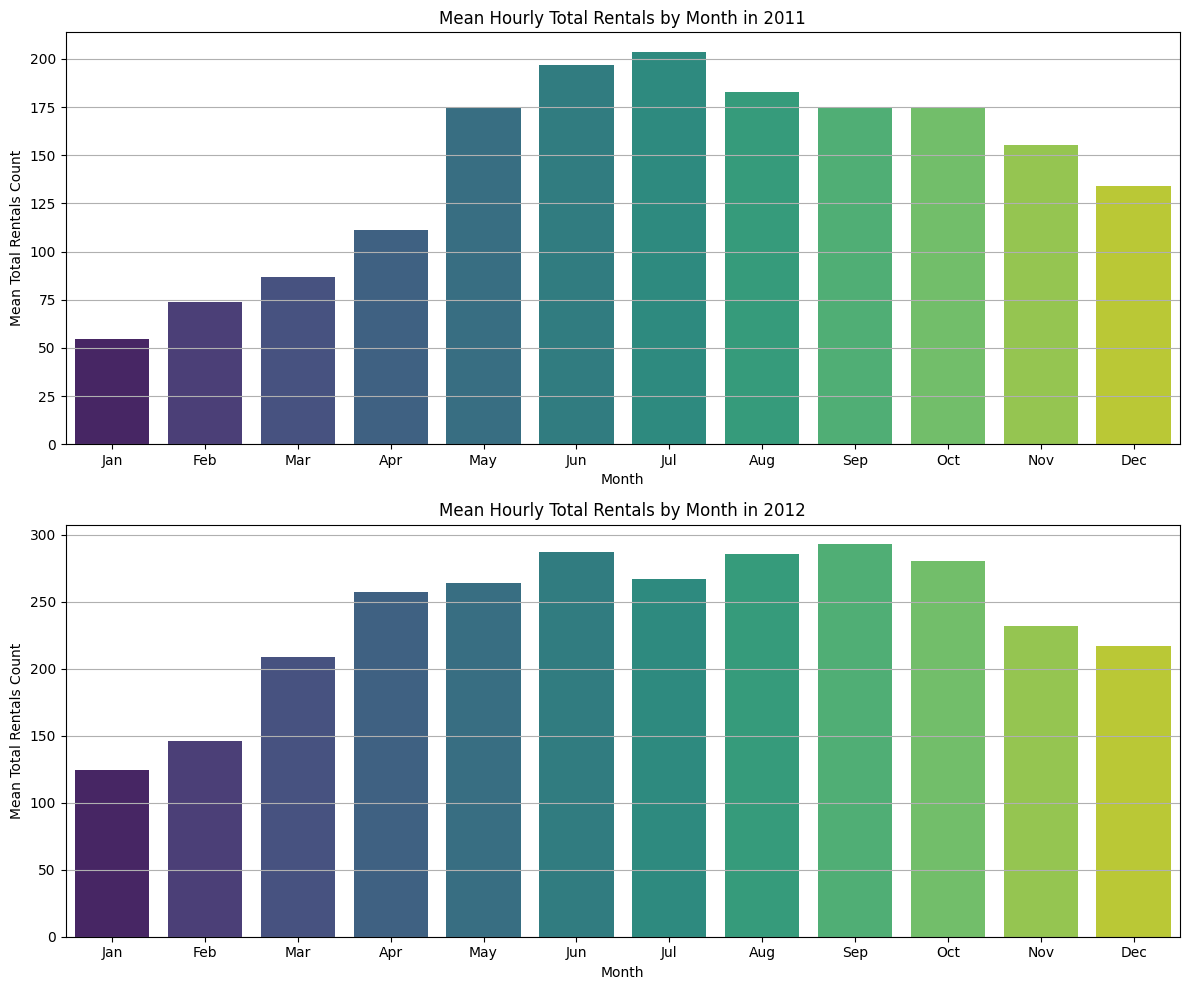

In [112]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

years = df['year'].unique()

for i, year in enumerate(years):
    year_df = df[df['year'] == year]
    mean_rentals_by_month_year = year_df.groupby('month')['count'].mean()
    sns.barplot(x=mean_rentals_by_month_year.index, y=mean_rentals_by_month_year.values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Mean Hourly Total Rentals by Month in {year}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Mean Total Rentals Count')
    axes[i].set_xticks(range(0, 12))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()

## 6. Plot the the mean and the 95% confidence interval of the hourly total rentals count for the four different weather categories. What can you observe ?

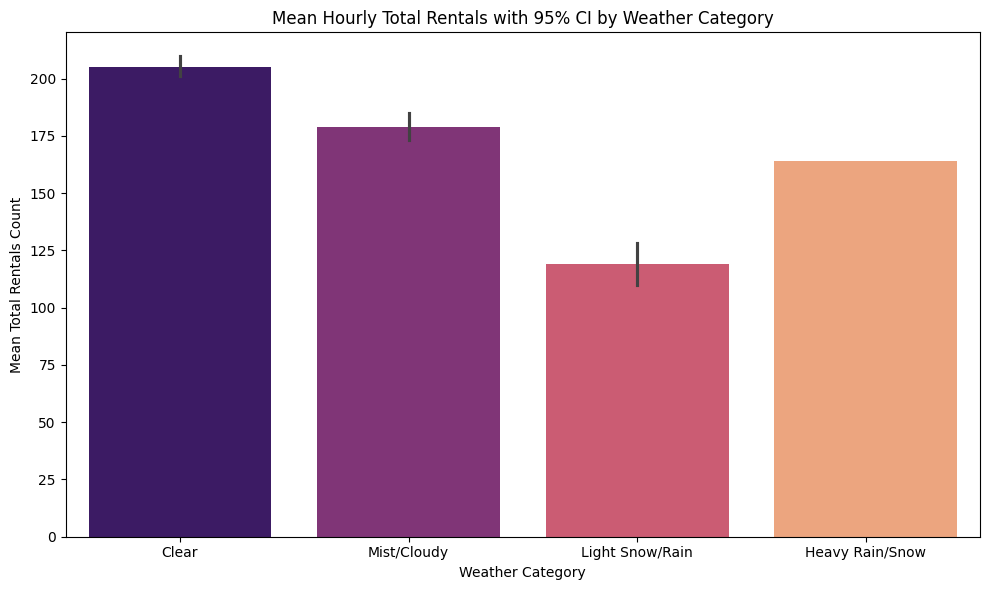

In [113]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weather', y='count', data=df, ci=95, palette='magma')

plt.title('Mean Hourly Total Rentals with 95% CI by Weather Category')
plt.xlabel('Weather Category')
plt.ylabel('Mean Total Rentals Count')
plt.xticks(ticks=[0, 1, 2, 3],labels=['Clear', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.tight_layout()
plt.show()

## 7. Plot the the mean of the hourly total rentals count versus the hour of the day. Which hours of the day have the highest rentals count ?

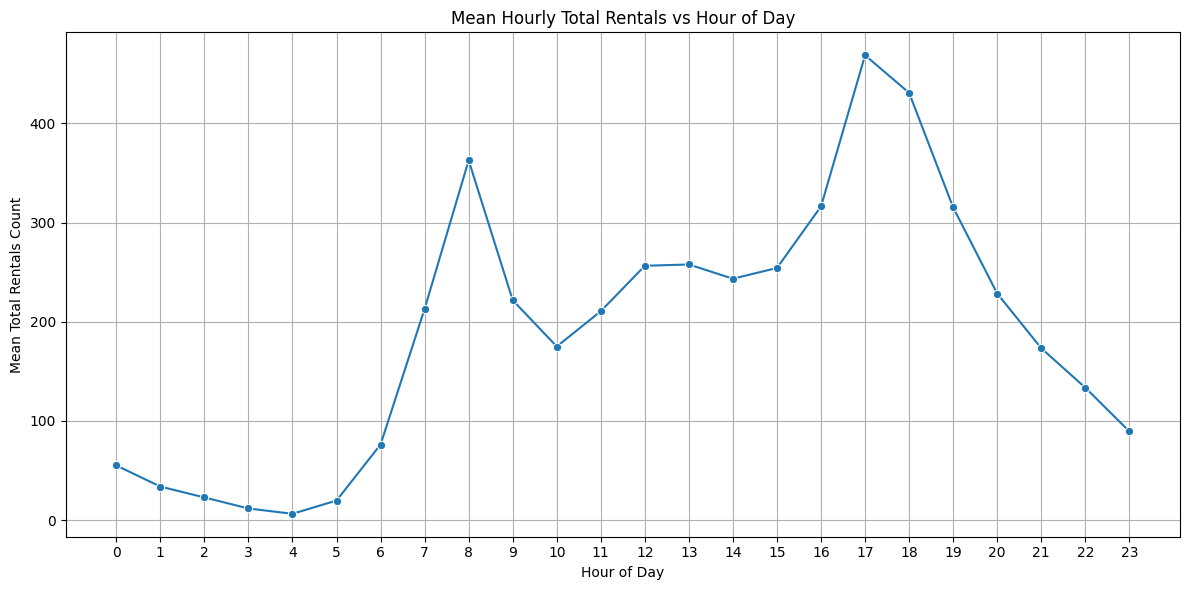


Hours with the highest mean total rentals:
hour_of_day
17    468.765351
18    430.859649
8     362.769231
Name: count, dtype: float64


In [114]:
mean_rentals_by_hour = df.groupby('hour_of_day')['count'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=mean_rentals_by_hour.index, y=mean_rentals_by_hour.values, marker='o')
plt.title('Mean Hourly Total Rentals vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Total Rentals Count')
plt.xticks(range(0, 24)) # Show all hours from 0 to 23
plt.grid(True)
plt.tight_layout()
plt.show()

highest_rental_hours = mean_rentals_by_hour.nlargest(3)
print(f"\nHours with the highest mean total rentals:\n{highest_rental_hours}")

## 8. Repeat the plot in 7 for different days of the week. What patterns can you observe ?

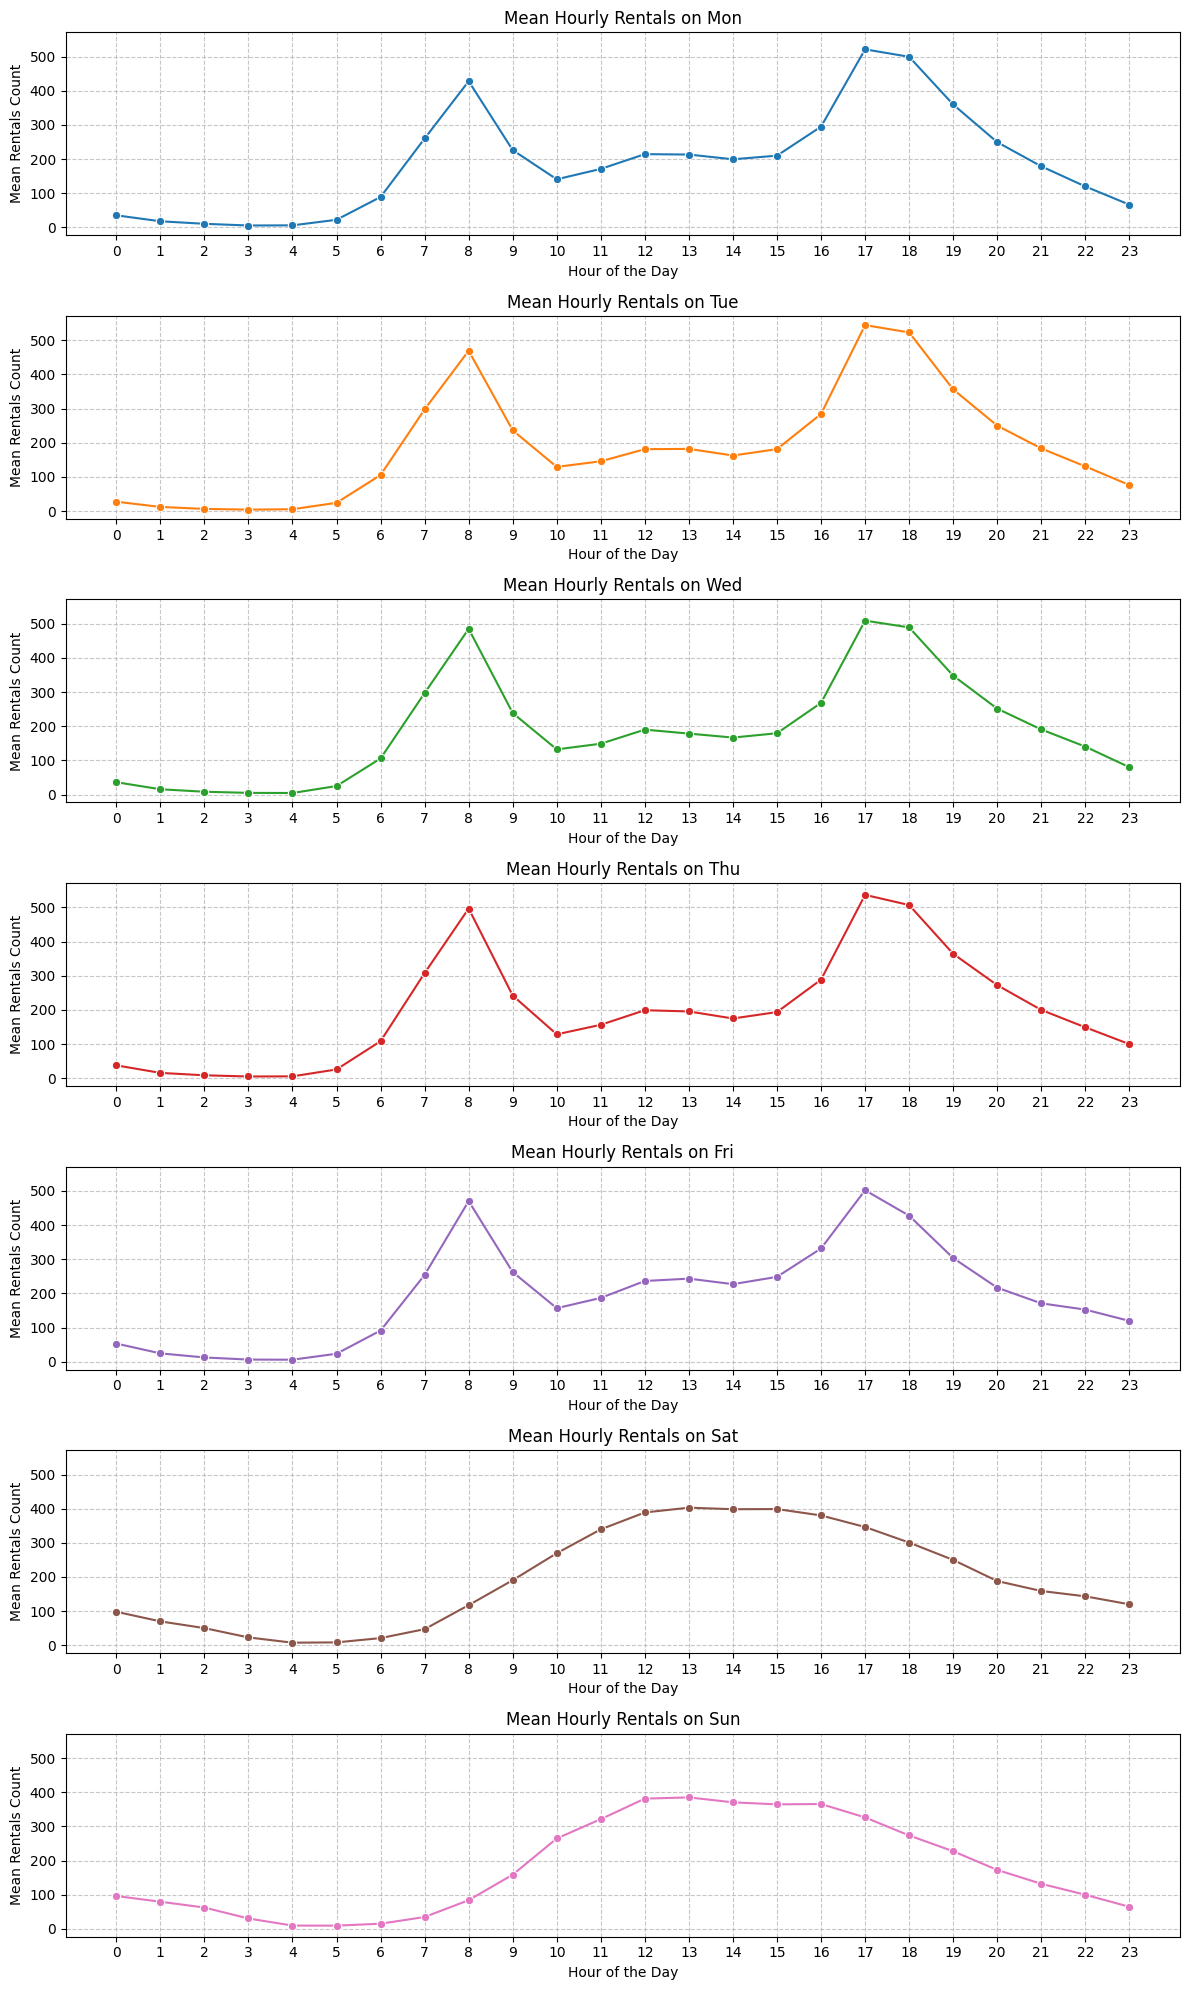

Observations:- 


1. Weekdays (Mon–Fri):
   Two peaks: morning (~7–9 AM) and evening (~5–7 PM) — typical commuter patterns.
2. Weekends (Sat–Sun):
   Mostly afternoon peak (~1–4 PM).
   Activity is more spread out, less pronounced morning/evening peaks.
3. Late night (1–5 AM):
   All days show very low rentals, as expected.



In [115]:
mean_hourly_day = df.groupby(['day_of_week', 'hour_of_day'])['count'].mean().reset_index()

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(12, 20), sharey=True)

days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
colors = sns.color_palette('tab10', 7)

for i, day in enumerate(range(7)):
    day_data = mean_hourly_day[mean_hourly_day['day_of_week'] == day]
    sns.lineplot( data=day_data, x='hour_of_day', y='count', marker='o', color=colors[i], ax=axes[i])

    axes[i].set_title(f'Mean Hourly Rentals on {days[i]}', fontsize=12)
    axes[i].set_xlabel('Hour of the Day')
    axes[i].set_ylabel('Mean Rentals Count')
    axes[i].set_xticks(range(0,24))
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


print("Observations:- ")
print('''
\n1. Weekdays (Mon–Fri):
   Two peaks: morning (~7–9 AM) and evening (~5–7 PM) — typical commuter patterns.
2. Weekends (Sat–Sun):
   Mostly afternoon peak (~1–4 PM).
   Activity is more spread out, less pronounced morning/evening peaks.
3. Late night (1–5 AM):
   All days show very low rentals, as expected.
''')

## 9. Repeat the plot in 8 for the four seasons using a multi-panel figure. What patterns can you observe ?

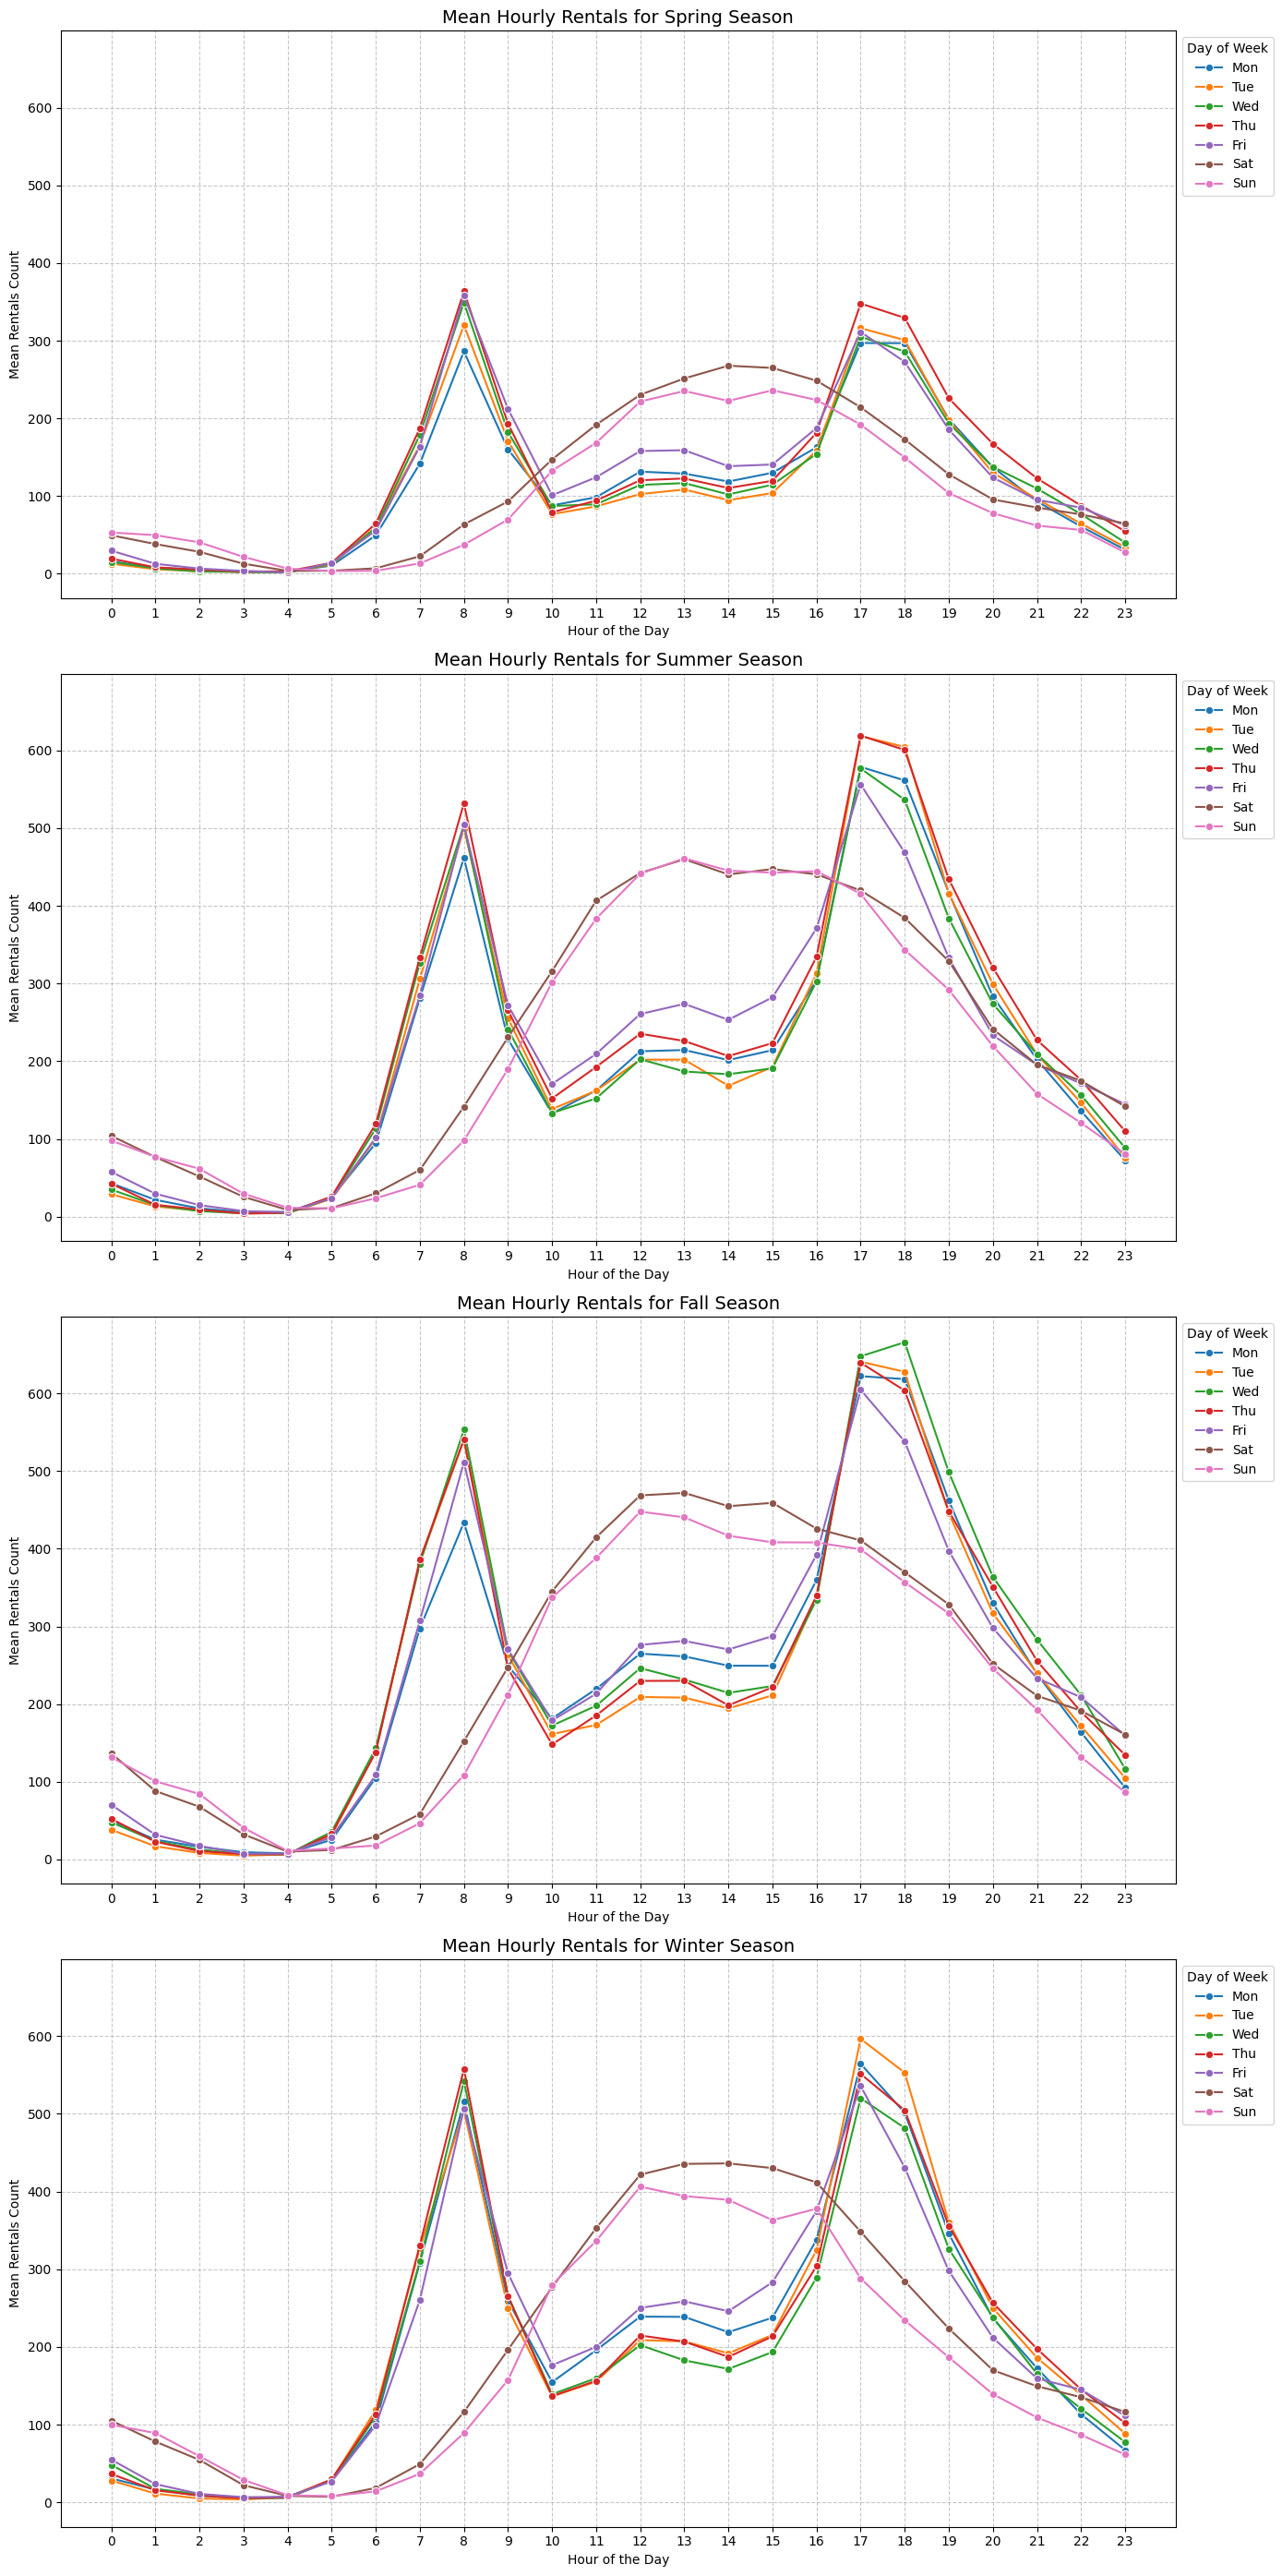


Observations:
1. Spring (lowest rental counts): The overall rental counts are much lower compared to other seasons, especially during morning and evening peaks. Weekends still show a leisure peak, but it's not as pronounced. The impact of cold weather is evident.

2. Summer and Fall (highest rental counts): These seasons show the highest rental volumes. Weekday commuting peaks (morning and evening) are very strong. Weekend leisure riding is also very popular, often reaching similar or even higher peak values than midday weekdays. Fall tends to have slightly higher overall numbers than summer, particularly in peak hours, potentially due to more pleasant temperatures than peak summer heat.

3. Winter (moderate rental counts, but higher than spring): Rental activity is still lower than summer/fall but generally higher than spring. Commuting patterns are still visible, but overall usage is suppressed due to colder weather. The weekend leisure peak is less prominent compared to warmer seas

In [116]:
seasons = df['season'].unique()

fig, axes = plt.subplots(nrows=len(seasons), ncols=1, figsize=(14, 28), sharey=True)

day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
colors = sns.color_palette('tab10', 7)

for i, season in enumerate(seasons):
    season_df = df[df['season'] == season]
    mean_hourly_day_season = season_df.groupby(['day_of_week', 'hour_of_day'])['count'].mean().reset_index()

    ax = axes[i]
    for day_of_week in range(7):
        day_data = mean_hourly_day_season[mean_hourly_day_season['day_of_week'] == day_of_week]
        sns.lineplot( data=day_data, x='hour_of_day', y='count', marker='o', color=colors[day_of_week], label=day_names[day_of_week], ax=ax)

    ax.set_title(f'Mean Hourly Rentals for {season.capitalize()} Season', fontsize=14)
    ax.set_xlabel('Hour of the Day')
    ax.set_ylabel('Mean Rentals Count')
    ax.set_xticks(range(0, 24))
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.legend(title='Day of Week', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

print("\nObservations:")
print("1. Spring (lowest rental counts): The overall rental counts are much lower compared to other seasons, especially during morning and evening peaks. Weekends still show a leisure peak, but it's not as pronounced. The impact of cold weather is evident.\n")
print("2. Summer and Fall (highest rental counts): These seasons show the highest rental volumes. Weekday commuting peaks (morning and evening) are very strong. Weekend leisure riding is also very popular, often reaching similar or even higher peak values than midday weekdays. Fall tends to have slightly higher overall numbers than summer, particularly in peak hours, potentially due to more pleasant temperatures than peak summer heat.\n")
print("3. Winter (moderate rental counts, but higher than spring): Rental activity is still lower than summer/fall but generally higher than spring. Commuting patterns are still visible, but overall usage is suppressed due to colder weather. The weekend leisure peak is less prominent compared to warmer seasons.\n")
print("4. General Trends across all seasons:")
print("   - Weekday (Mon-Fri) patterns consistently show two distinct peaks (morning and evening commute). ")
print("   - Weekend (Sat-Sun) patterns consistently show a single broad afternoon peak, indicative of leisure activity. ")
print("   - The magnitude of these peaks and overall rental volume varies significantly with the season, demonstrating strong seasonal influence.")

## 10. Plot the the mean and the 95% confidence interval of the hourly total rentals count versus the period of the day column, which you created in the first part of the assignment. Which period of the day has the highest rentals count ? Does this peak period differ for working and non-working days ?

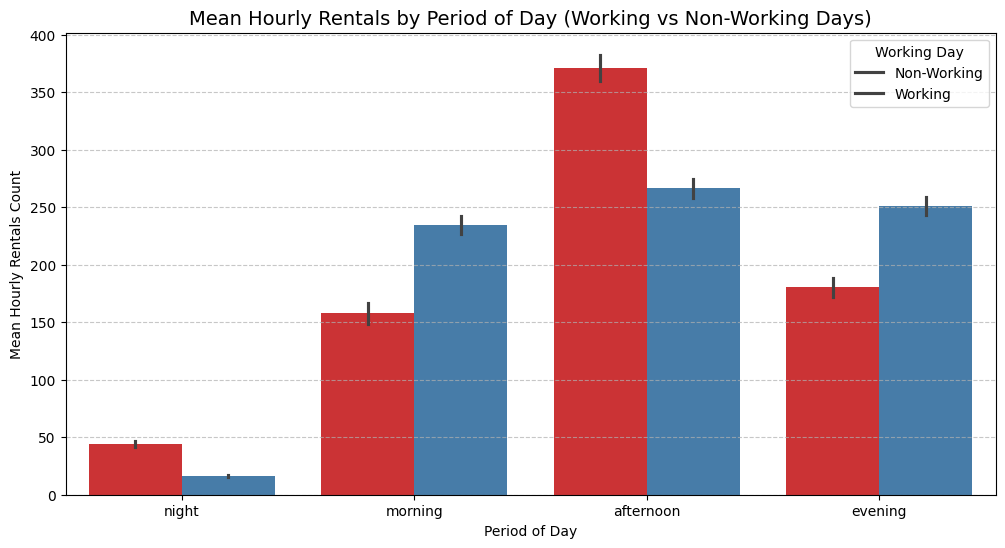

In [117]:
plt.figure(figsize=(12,6))

sns.barplot( data=df, x='day_period', y='count', hue='workingday', ci=95, palette='Set1')

plt.title('Mean Hourly Rentals by Period of Day (Working vs Non-Working Days)', fontsize=14)
plt.xlabel('Period of Day')
plt.ylabel('Mean Hourly Rentals Count')
plt.legend(title='Working Day', labels=['Non-Working','Working'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 11. Plot a heatmap for the correlation matrix of the dataset numerical variables. What observations can you make ?

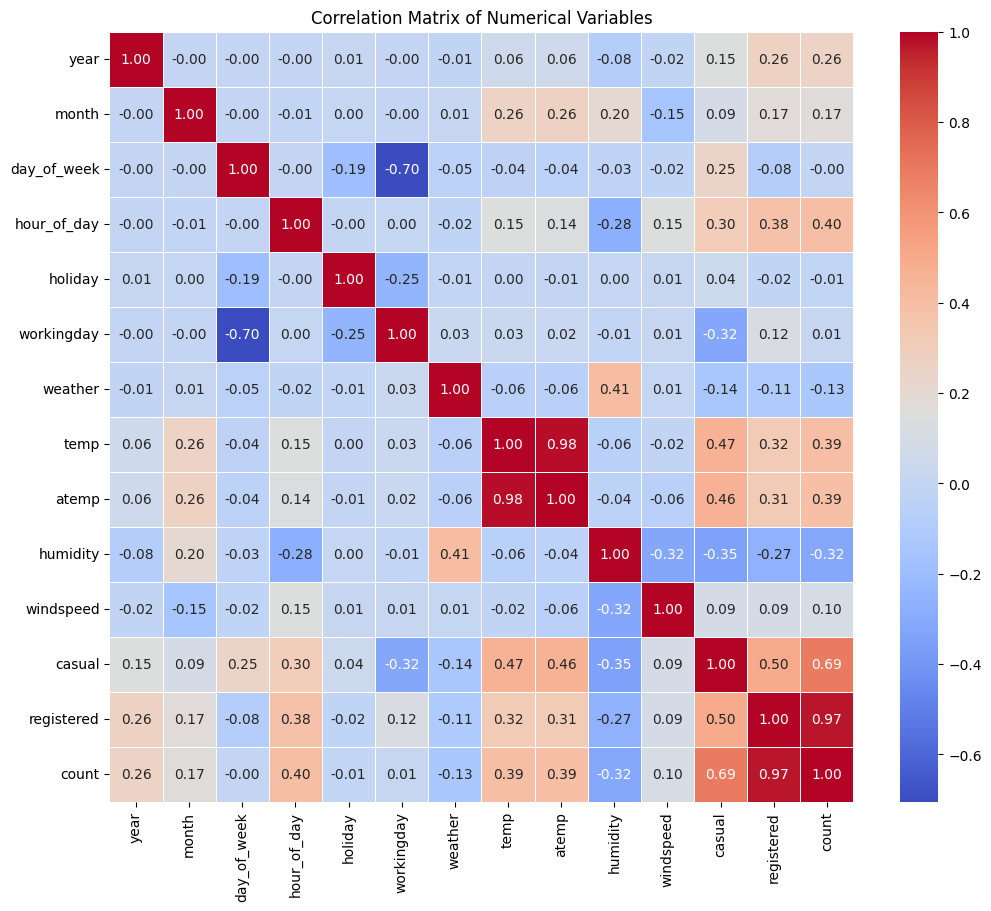


Observations from the correlation heatmap:

1. Count vs temp/feelslike/atemp:
   - 'count' (total rentals) shows strong positive correlation with temperature-related variables.
   - Warmer days → higher rentals.

2. Count vs humidity or windspeed:
   - Slight negative correlation with humidity and windspeed.
   - Bad weather reduces rentals.

3. temp vs atemp/feelslike:
   - Highly correlated (expected, since they measure similar aspects of temperature).

4. Casual vs registered rentals:
   - Strong positive correlation with 'count' (since count = casual + registered).

5. Year vs count:
   - Slight positive correlation may indicate a gradual increase in rentals over the years.

6. Other weather/season variables:
   - Low or moderate correlation with 'count', showing some influence but less significant than temperature or casual/registered splits.



In [118]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap( correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

print("""
Observations from the correlation heatmap:

1. Count vs temp/feelslike/atemp:
   - 'count' (total rentals) shows strong positive correlation with temperature-related variables.
   - Warmer days → higher rentals.

2. Count vs humidity or windspeed:
   - Slight negative correlation with humidity and windspeed.
   - Bad weather reduces rentals.

3. temp vs atemp/feelslike:
   - Highly correlated (expected, since they measure similar aspects of temperature).

4. Casual vs registered rentals:
   - Strong positive correlation with 'count' (since count = casual + registered).

5. Year vs count:
   - Slight positive correlation may indicate a gradual increase in rentals over the years.

6. Other weather/season variables:
   - Low or moderate correlation with 'count', showing some influence but less significant than temperature or casual/registered splits.
""")

